In [142]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [143]:
import scanpy as sc
import pandas as pd
import scanpy as sc 
import sys 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib as mpl
warnings.filterwarnings('ignore')
sys.path.append('../../src')
from spaceoracle.plotting.cartography import xy_from_adata
from spaceoracle.virtual_tissue import VirtualTissue

In [46]:
adata = sc.read_h5ad('/Volumes/SSD/training_data/mouse_brain_wt_slideseq.h5ad')
adata

AnnData object with n_obs × n_vars = 23409 × 3311
    obs: 'cell_type', 'cell_type_int', 'seurat_clusters', 'umap_1', 'umap_2', 'author_cell_type'
    uns: 'cell_thresholds', 'received_ligands', 'received_ligands_tfl'
    obsm: 'X_umap', 'spatial', 'spatial_unscaled'
    layers: 'imputed_count', 'normalized_count', 'raw_count'

In [47]:
savefig_params = {
    'dpi': 300, 
    'bbox_inches': 'tight', 
    'format': 'svg', 
    'transparent': True
}

plt.rcParams.update({
    "text.usetex": False,
    "svg.fonttype": 'none'
})

In [48]:
df = pd.read_parquet('/Volumes/SSD/genome_screens/mouse_embryo')

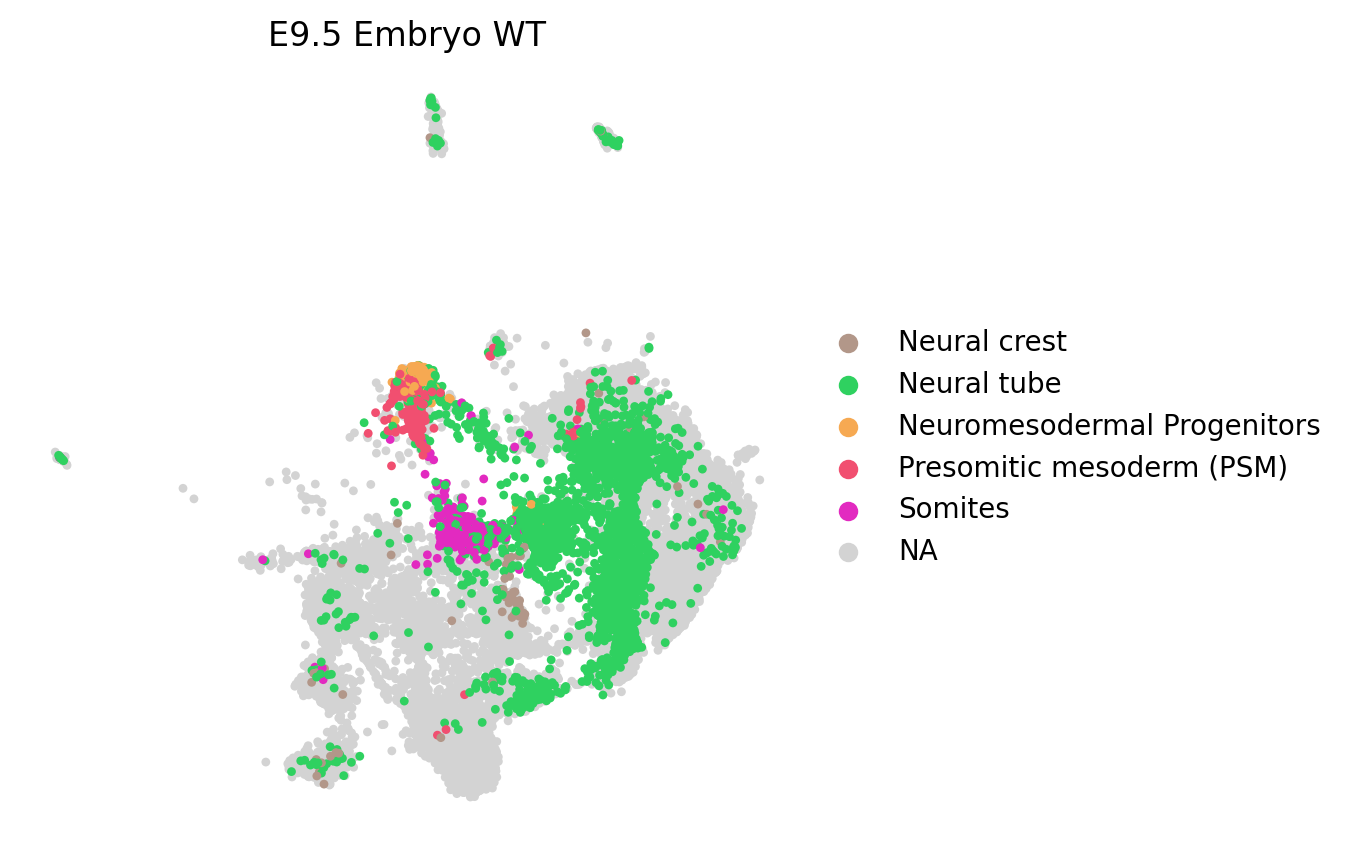

In [49]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 100

sc.pl.embedding(adata, 
        color=['cell_type'], frameon=False, basis='umap', s=40, 
        groups=[
            'Somites', 'Presomitic mesoderm (PSM)', 'Neural crest', 
            'Neural tube', 'Neuromesodermal Progenitors '], 
        add_outline=False,
        title=['E9.5 Embryo WT'],
                palette = {
                    'Ectopic tube': "#1af8e6",
                    'Neural tube': "#2fd160",
                    'Neural plate': "#e3f637",
                    'Neural crest': "#b29789",
                    'Somites': "#e22ac0",
                    'Presomitic mesoderm (PSM)': "#f14f70", 
                    'Neuromesodermal Progenitors ': "#f6a952",
                    'Amnion mesoderm early': 'lightgray',
                    'Amnion mesoderm late': 'lightgray',
                    'Angioblasts': 'lightgray',
                    'Brain': 'lightgray',
                    'Heart': 'lightgray',
                    'Mesenchyme': 'lightgray',
                    'Pharyngeal arch': 'lightgray',
                    'Preplacodal ectoderm': 'lightgray',
                    'Secondary heart field (SHF)': 'lightgray'
                })

In [50]:
import json

with open('./colors.json', 'r') as f:
    color_dict = json.load(f)

In [51]:
from spaceoracle.plotting.cartography import xy_from_adata

In [52]:
wtko = sc.read_h5ad('/Users/koush/Downloads/mouse_trunkTbx6WT_KO.h5ad')
wtko.var_names = wtko.var['feature_name']
wt = wtko[wtko.obs['orig.ident'] == '200703_25']
ko = wtko[wtko.obs['orig.ident'] == '200808_21']
del wt.raw
del ko.raw
wt.obsm['X_umap'] = wt.obs[['umap_1', 'umap_2']].values
ko.obsm['X_umap'] = ko.obs[['umap_1', 'umap_2']].values

ko.obs['cell_type'] = ko.obs[['seurat_clusters']].replace(
    {
        '5': 'Neural plate', 
        '4': 'Neural crest', 
        '3': 'Central tube', 
        '2': 'Ectopic tube',
        '0': 'Central tube',
        
    }
)
ko.obs['cell_type'].value_counts()

adata = sc.read_h5ad('/Volumes/SSD/training_data/mouse_brain_wt_slideseq.h5ad')
adata.X = adata.layers['imputed_count'].copy()
dfko = pd.read_parquet('/Volumes/SSD/genome_screens/mouse_embryo/Tbx6_4n_0x.parquet')
adata = adata[dfko.index]
adata = adata.concatenate(ko)

del adata.uns
xy = xy_from_adata(adata)
og_obs = adata.obs.copy()
dfko = pd.concat([dfko, ko.to_df()], axis=0).dropna(axis=1)
adata.obs.index = dfko.index
adata.layers['imputed_count'] = adata.X.toarray()
adata = adata[adata.obs.cell_type.isin(color_dict.keys())]

umap_coords = adata.obsm['X_umap']
dfko = dfko.loc[pd.DataFrame(umap_coords, columns=['UMAP1', 'UMAP2'], index=adata.obs_names).query(
    'UMAP1 > -3 and UMAP2 > -2 and UMAP2 < 9').index]

sc.pp.neighbors(adata, n_neighbors=200)
sc.tl.leiden(adata, resolution=0.2)

adata.obs.loc[(adata.obs['leiden'] == '0') & (adata.obs['cell_type'] == 'Neural tube'), 'cell_type_2'] = 'Ectopic tube'
adata.obs.loc[~((adata.obs['leiden'] == '0') & (adata.obs['cell_type'] == 'Neural tube')), 'cell_type_2'] = adata.obs['cell_type']

In [53]:
embryo = VirtualTissue(
    adata = adata,
    annot = 'cell_type_2',
    color_dict=color_dict
)

embryo.init_cartography(adata[adata.obs_names.isin(dfko.index)], 
    # restrict_to=[]
)

In [71]:
perturbed_df = pd.read_parquet('/Users/koush/Downloads/Tbx6_4n_0x.parquet')

In [73]:
adata_wt = sc.read_h5ad('/Volumes/SSD/training_data/mouse_brain_wt_slideseq.h5ad')

In [97]:
list(adata_wt.obs.cell_type.unique())

['Amnion mesoderm early',
 'Neural tube',
 'Heart',
 'Angioblasts',
 'Brain',
 'Secondary heart field (SHF)',
 'Somites',
 'Preplacodal ectoderm',
 'Neuromesodermal Progenitors ',
 'Pharyngeal arch',
 'Presomitic mesoderm (PSM)',
 'Neural crest',
 'Mesenchyme',
 'Amnion mesoderm late']

In [140]:
obs_names = adata_wt[adata_wt.obs.cell_type.isin(
    [
        # 'Neural tube', 
        'Somites',
        'Neuromesodermal Progenitors ',
        'Presomitic mesoderm (PSM)'
        
    ])].obs_names

In [141]:
((perturbed_df - adata_wt.to_df(layer='imputed_count')).loc[obs_names][
    ['Olig2', 'Sox3', 'Nkx6-1','Shh', 'Aldh1a2']].mean() / adata_wt.to_df(layer='imputed_count').loc[obs_names][
    ['Olig2', 'Sox3', 'Nkx6-1','Shh', 'Aldh1a2']].mean()) * 100

gene_symbols
Olig2     -69.709591
Sox3      -13.781732
Nkx6-1    -41.661975
Shh       -47.793681
Aldh1a2    64.033392
dtype: float64

In [114]:
xy_data = xy_from_adata(adata_wt)

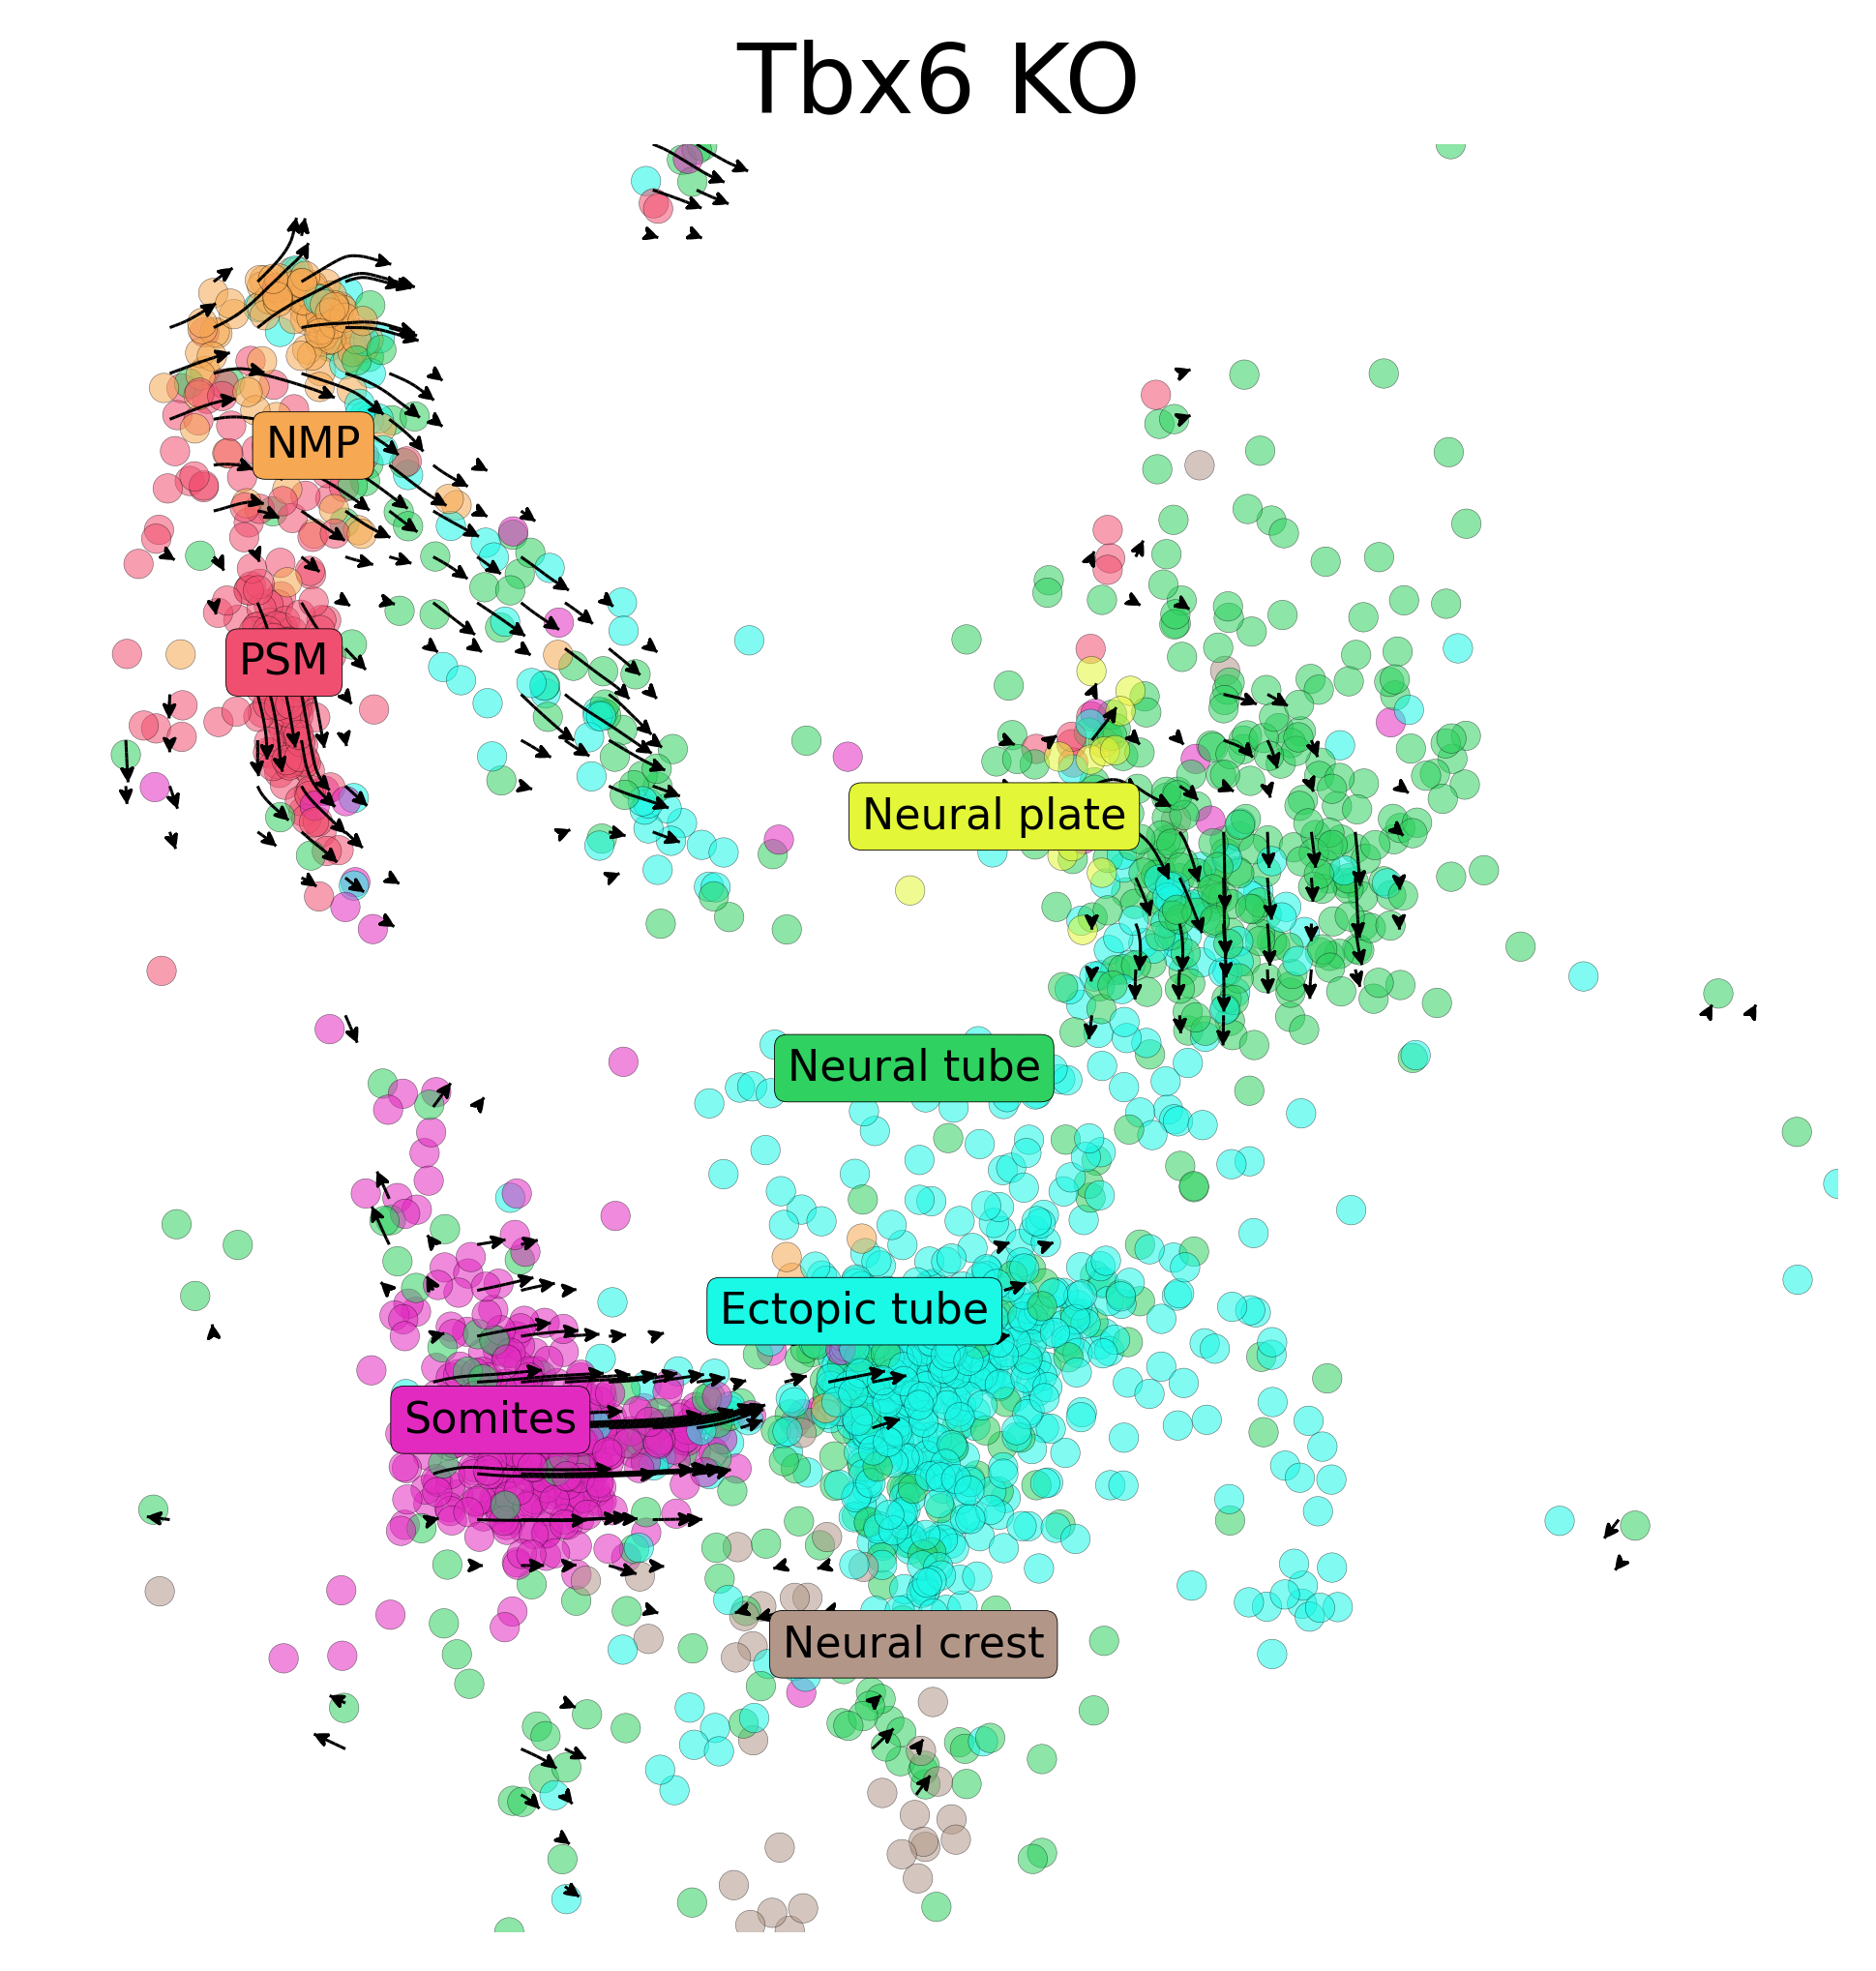

In [58]:
# perturbed_df = pd.read_parquet('/Users/koush/Downloads/Tbx6_4n_0x.parquet')

grid_points, vector_field = embryo.plot_arrows(
    perturb_target='', 
    perturbed_df=dfko,
    mode='0',
    hue='cell_type_2',
    curve=True,
    vector_scale=1, 
    grid_scale=1,
    n_neighbors=400,
    scale=10, 
    grains=40,
    figsize=(6, 6),
    dpi=200,
    alpha=0.55,
    scatter_size=30,
    legend_fontsize=8,
    dynamic_alpha=False,
    threshold=0.065,
    rename={
        'Presomitic mesoderm (PSM)': 'PSM', 
        'Neuromesodermal Progenitors ': 'NMP'
    },
    grey_out=False,
    limit_clusters=True,
    highlight_clusters=[
        # 'Ectopic tube',
        'Neural tube',
        'Somites',
        'Presomitic mesoderm (PSM)',
        'Neuromesodermal Progenitors ',
        'Neural crest',
    ]
)
plt.title('Tbx6 KO', fontsize=18)
plt.savefig(
    './figures/Tbx6_ko.svg', 
    **savefig_params
)
plt.show()

In [59]:
wtko = sc.read_h5ad('/Users/koush/Downloads/mouse_trunkTbx6WT_KO.h5ad')
wtko.var_names = wtko.var['feature_name']
wt = wtko[wtko.obs['orig.ident'] == '200703_25']
ko = wtko[wtko.obs['orig.ident'] == '200808_21']
del wt.raw
del ko.raw
wt.obsm['X_umap'] = wt.obs[['umap_1', 'umap_2']].values
ko.obsm['X_umap'] = ko.obs[['umap_1', 'umap_2']].values

ko.obs['cell_type'] = ko.obs[['seurat_clusters']].replace(
    {
        '5': 'Neural plate', 
        '4': 'Neural crest', 
        '3': 'Central tube', 
        '2': 'Ectopic tube',
        '0': 'Central tube',
        
    }
)
ko.obs['cell_type'].value_counts()

adata = sc.read_h5ad('/Volumes/SSD/training_data/mouse_brain_wt_slideseq.h5ad')
adata.X = adata.layers['imputed_count'].copy()
dfko = pd.read_parquet('/Volumes/SSD/genome_screens/mouse_embryo/Sox2_4n_maxx.parquet')
adata = adata[dfko.index]
adata = adata.concatenate(ko)


del adata.uns
xy = xy_from_adata(adata)
og_obs = adata.obs.copy()
dfko = pd.concat([dfko, ko.to_df()], axis=0).dropna(axis=1)
adata.obs.index = dfko.index
adata.layers['imputed_count'] = adata.X.toarray()
adata = adata[adata.obs.cell_type.isin(color_dict.keys())]

umap_coords = adata.obsm['X_umap']
dfko = dfko.loc[pd.DataFrame(umap_coords, columns=['UMAP1', 'UMAP2'], index=adata.obs_names).query(
    'UMAP1 > -3 and UMAP2 > -2 and UMAP2 < 9').index]

sc.pp.neighbors(adata, n_neighbors=200)
sc.tl.leiden(adata, resolution=0.2)

adata.obs.loc[(adata.obs['leiden'] == '0') & (adata.obs['cell_type'] == 'Neural tube'), 'cell_type_2'] = 'Ectopic tube'
adata.obs.loc[~((adata.obs['leiden'] == '0') & (adata.obs['cell_type'] == 'Neural tube')), 'cell_type_2'] = adata.obs['cell_type']

In [60]:
embryo = VirtualTissue(
    adata = adata,
    annot = 'cell_type_2',
    color_dict=color_dict
)

embryo.init_cartography(adata[adata.obs_names.isin(dfko.index)], 
    # restrict_to=[]
)

In [61]:
import commot as ct

In [62]:
ct_mouse = ct.pp.ligand_receptor_database(
    database='CellChat', 
    species='mouse', 
    signaling_type=None
) 
ct_mouse.columns = ['ligand', 'receptor', 'pathway', 'signaling']
ct_mouse.to_csv('/Users/koush/Projects/SpaceOracle/data/cellchat_mouse.csv', index=False)

In [63]:
ct_human = ct.pp.ligand_receptor_database(
    database='CellChat', 
    species='human', 
    signaling_type=None
) 
ct_human.columns = ['ligand', 'receptor', 'pathway', 'signaling']
ct_human.to_csv('/Users/koush/Projects/SpaceOracle/data/cellchat_human.csv', index=False)

In [64]:
pd.read_csv('/Users/koush/Projects/SpaceOracle/data/cellchat_human.csv')

ligand       receptor pathway           signaling
0           TGFB1  TGFBR1_TGFBR2    TGFb  Secreted Signaling
1           TGFB2  TGFBR1_TGFBR2    TGFb  Secreted Signaling
2           TGFB3  TGFBR1_TGFBR2    TGFb  Secreted Signaling
3           TGFB1  ACVR1B_TGFBR2    TGFb  Secreted Signaling
4           TGFB1  ACVR1C_TGFBR2    TGFb  Secreted Signaling
...           ...            ...     ...                 ...
1934        TIGIT            PVR   TIGIT   Cell-Cell Contact
1935  ITGA4_ITGB1          VCAM1    VCAM   Cell-Cell Contact
1936  ITGA9_ITGB1          VCAM1    VCAM   Cell-Cell Contact
1937  ITGA4_ITGB7          VCAM1    VCAM   Cell-Cell Contact
1938         VSIR         IGSF11   VISTA   Cell-Cell Contact

[1939 rows x 4 columns]

In [65]:
# atmp = adata[adata.obs.cell_type_2 != 'Ectopic tube']

# embryo.init_cartography(atmp[atmp.obs_names.isin(dfko.index)], )

# embryo.chart.plot_umap(
#     hue='cell_type_2',
#     scatter_size=30,
#     figsize=(6, 6),
#     alpha=0.7,
#     dpi=200, 
#     rename={
#         'Presomitic mesoderm (PSM)': 'PSM', 
#         'Neuromesodermal Progenitors ': 'NMP'
#     }, highlight_clusters=[
#         'Somites',
#         'Neuromesodermal Progenitors ',
#         'Presomitic mesoderm (PSM)',
#         'Neural tube', 'Ectopic tube'])
# plt.savefig(
#     './figures/WT_umap.svg', 
#     **savefig_params
# )
# plt.show()

In [66]:
# atmp = adata[~adata.obs.cell_type_2.isin(['Somites'])]

# embryo.init_cartography(atmp[atmp.obs_names.isin(dfko.index)], )

# embryo.chart.plot_umap(
#     hue='cell_type_2',
#     scatter_size=30,
#     figsize=(6, 6),
#     alpha=0.7,
#     dpi=200, 
#     rename={
#         'Presomitic mesoderm (PSM)': 'PSM', 
#         'Neuromesodermal Progenitors ': 'NMP'
#     }, highlight_clusters=[
#         'Somites',
#         'Neuromesodermal Progenitors ',
#         'Presomitic mesoderm (PSM)',
#         'Neural tube', 'Ectopic tube'])

# plt.savefig(
#     './figures/KO_umap.svg', 
#     **savefig_params
# )
# plt.show()

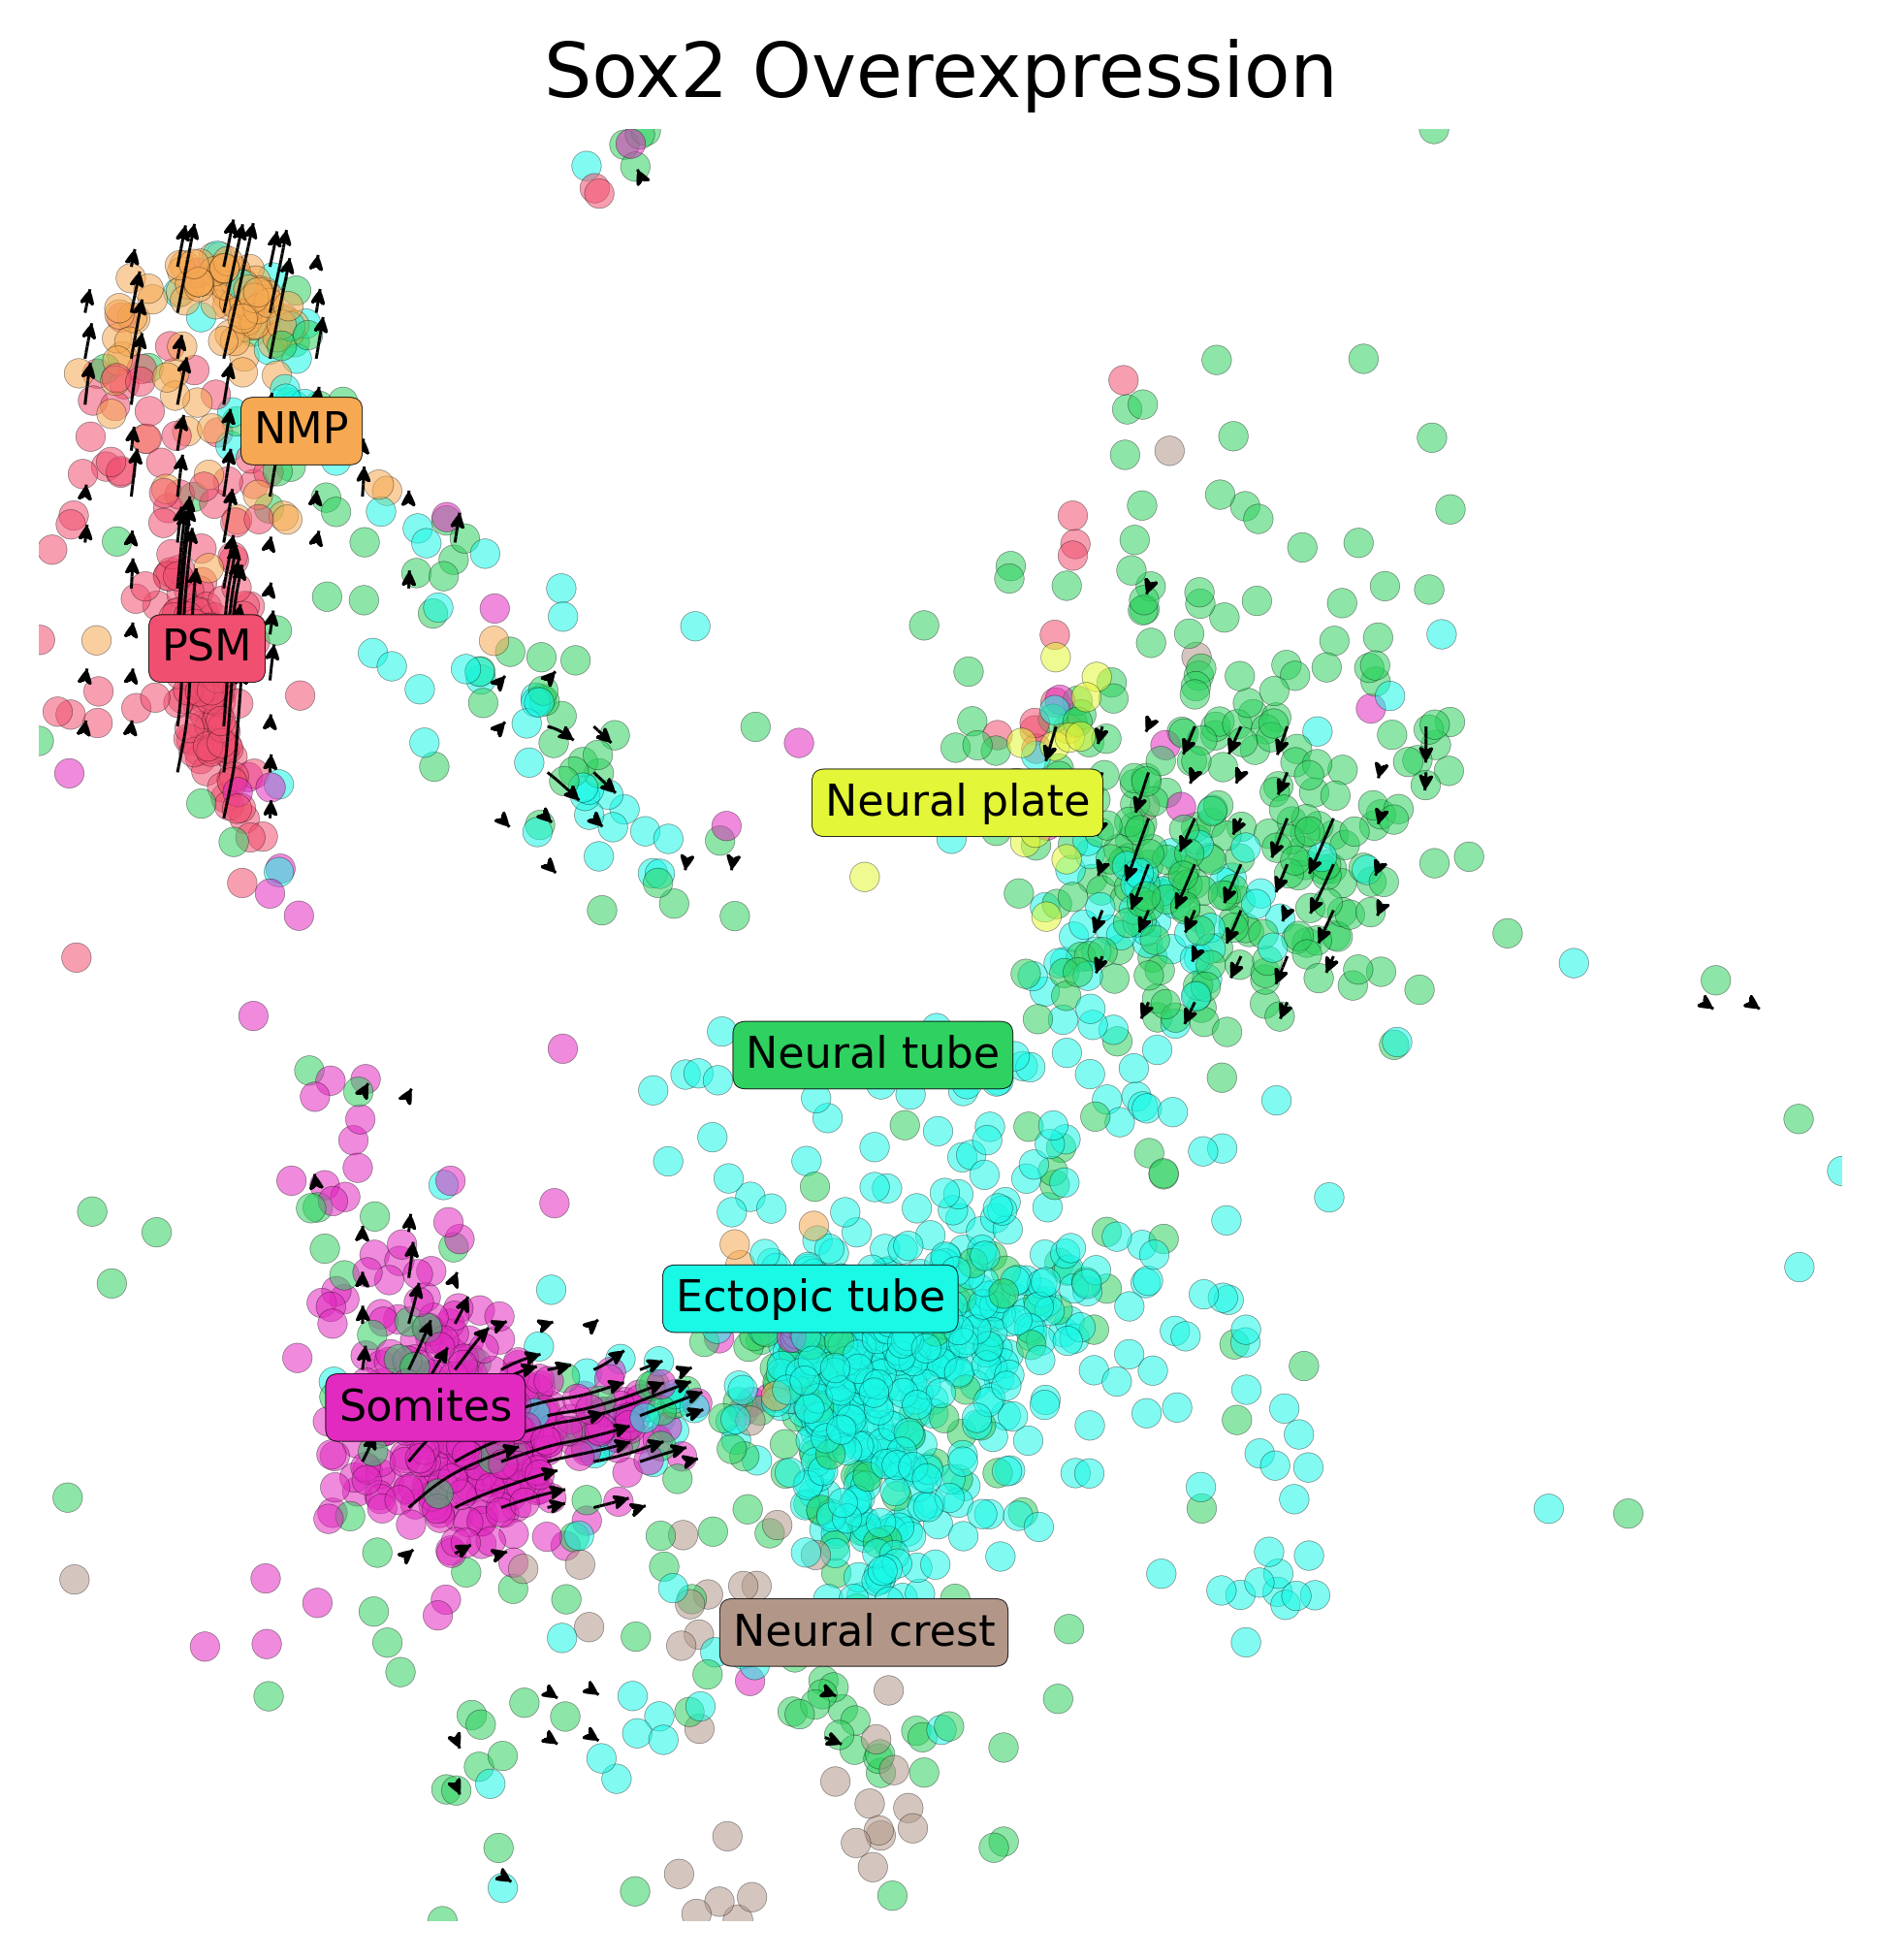

In [70]:
grid_points, vector_field = embryo.plot_arrows(
    perturb_target='', 
    perturbed_df=dfko,
    mode='0',
    hue='cell_type_2',
    curve=True,
    vector_scale=1, 
    grid_scale=1,
    n_neighbors=350,
    scale=10, 
    grains=40,
    figsize=(6, 6),
    dpi=200,
    alpha=0.55,
    scatter_size=30,
    legend_fontsize=8,
    dynamic_alpha=False,
    threshold=0.05,
    rename={
        'Presomitic mesoderm (PSM)': 'PSM', 
        'Neuromesodermal Progenitors ': 'NMP'
    },
    grey_out=False,
    limit_clusters=True,
    highlight_clusters=[
        # 'Ectopic tube',
        'Neural tube',
        'Somites',
        'Presomitic mesoderm (PSM)',
        'Neuromesodermal Progenitors ',
        'Neural crest',
    ]
)
plt.title('Sox2 Overexpression', fontsize=14)
plt.savefig(
    './figures/Sox2_overexpr.svg', 
    **savefig_params
)
plt.show()

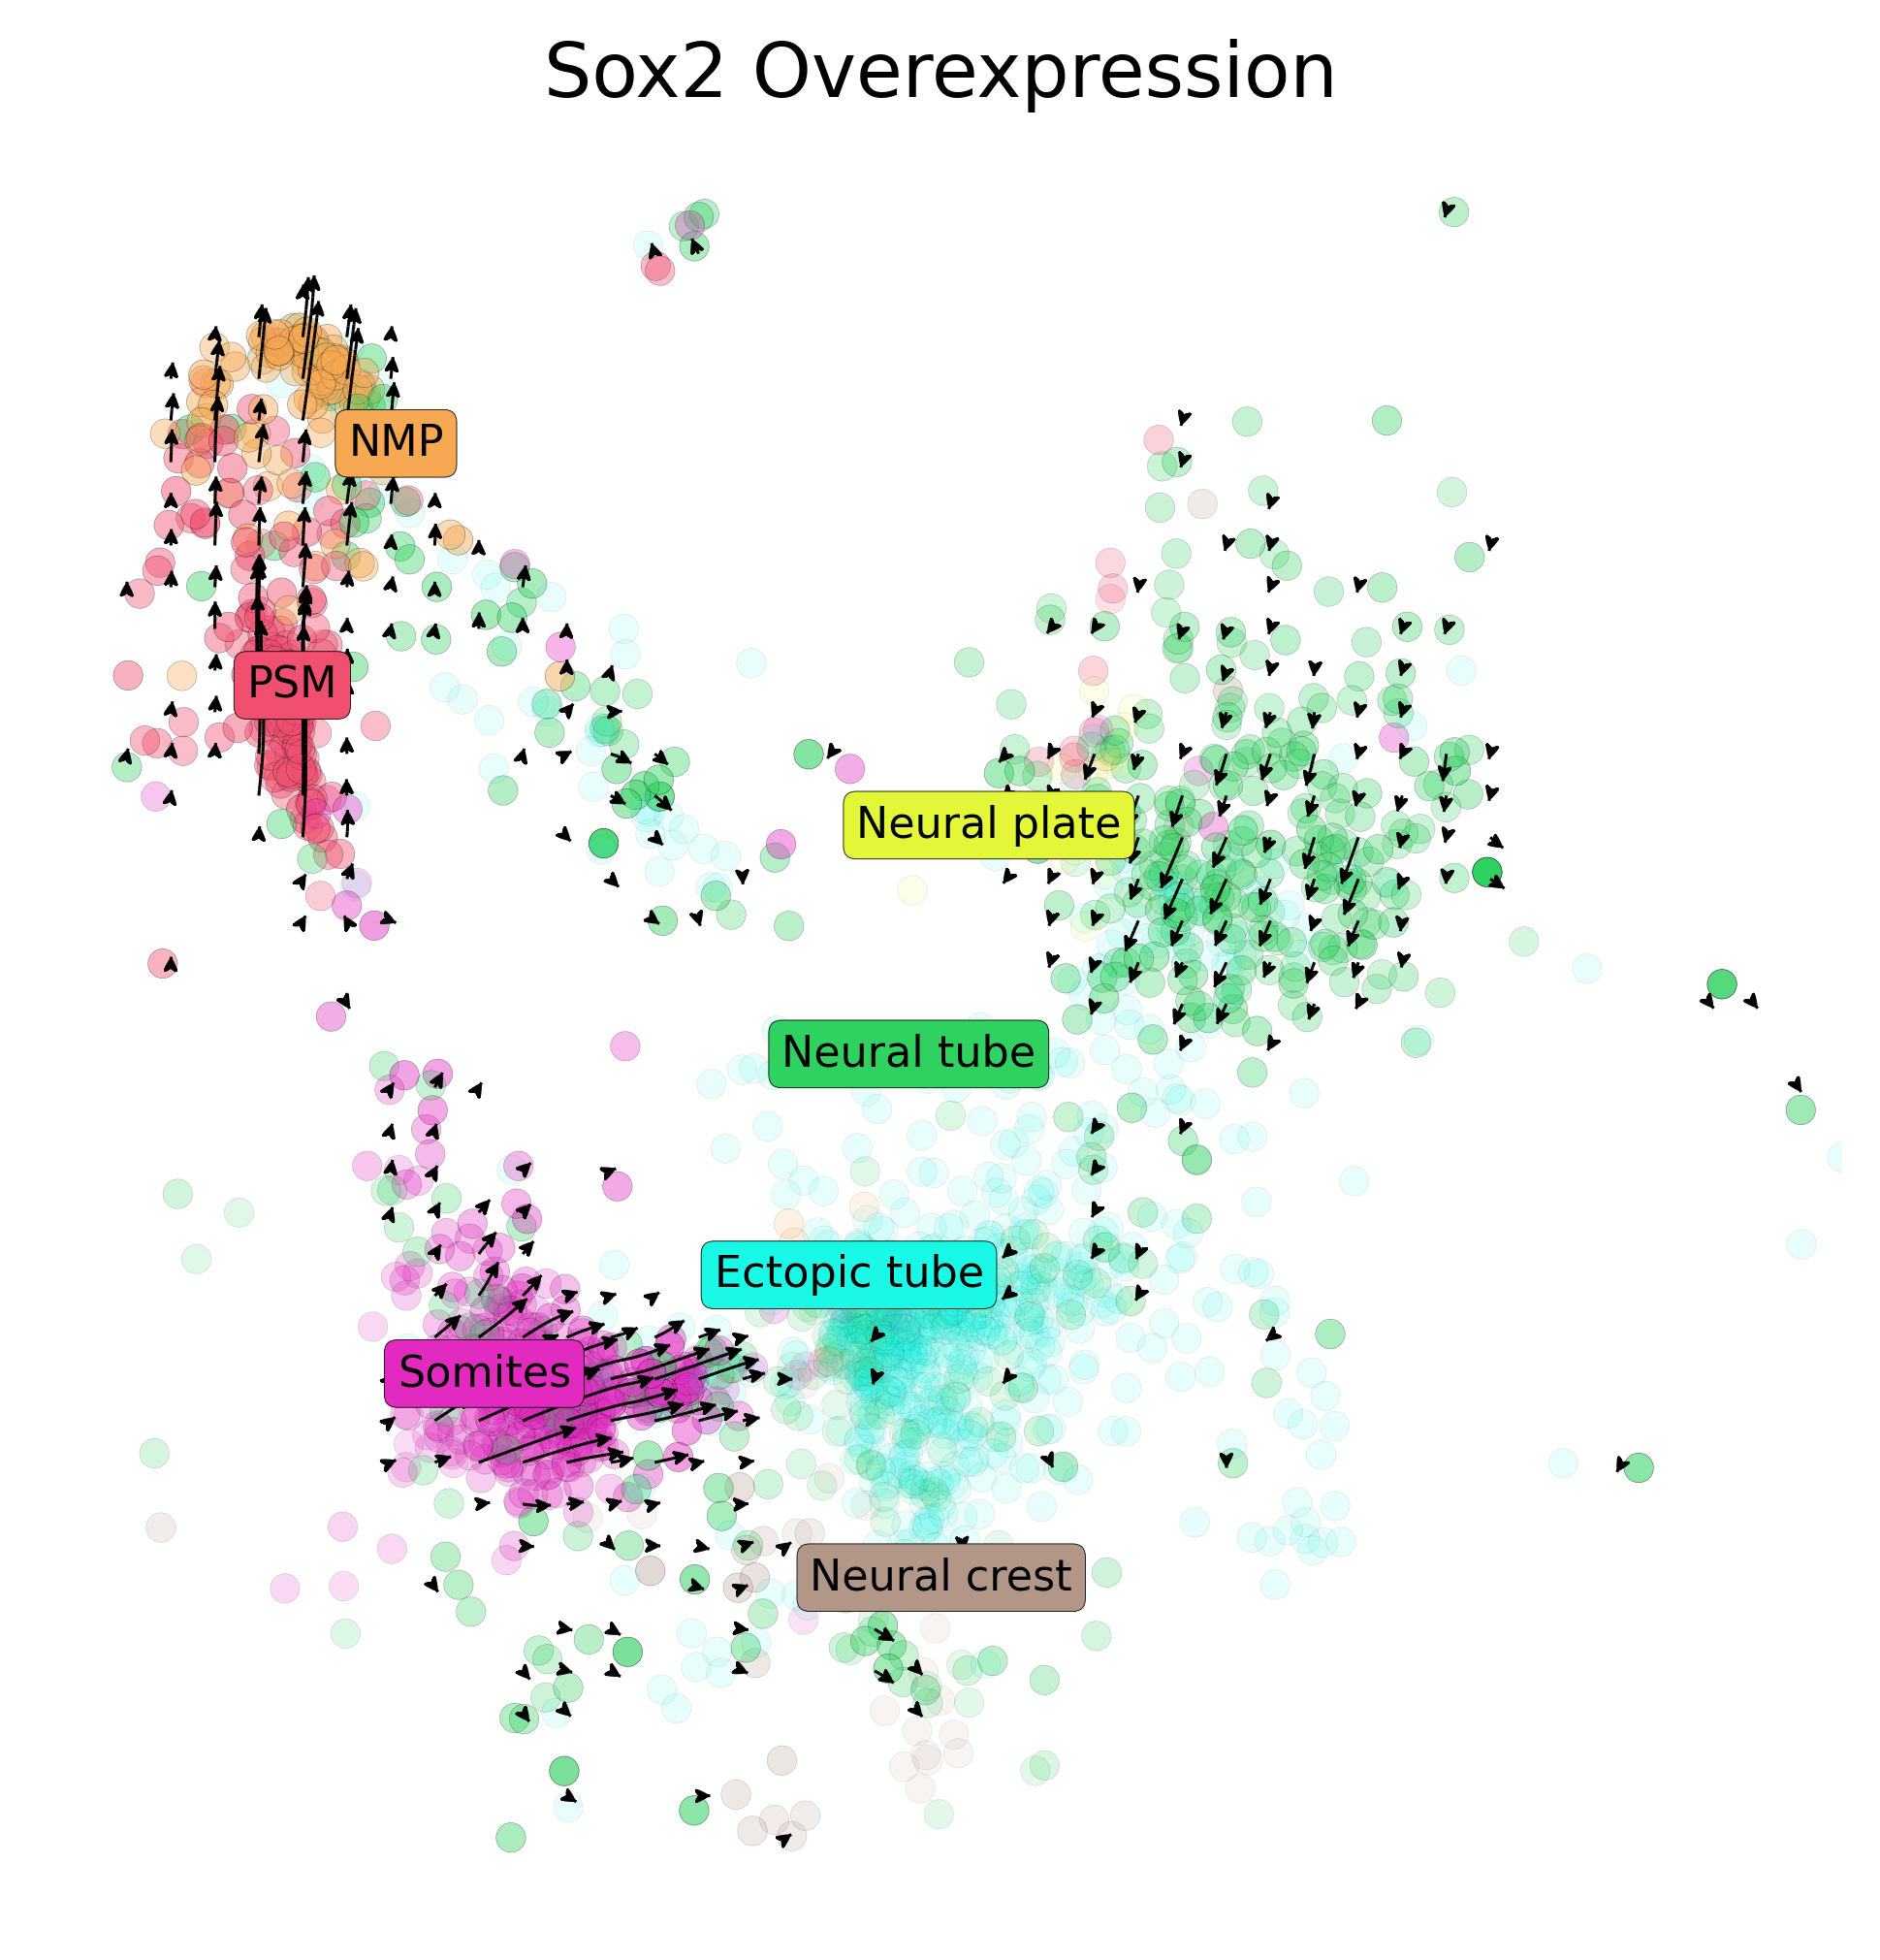

In [ ]:
grid_points, vector_field = embryo.plot_arrows(
    perturb_target='', 
    perturbed_df=dfko,
    mode='0',
    hue='cell_type_2',
    curve=True,
    vector_scale=1, 
    grid_scale=1,
    n_neighbors=400,
    scale=10, 
    grains=40,
    figsize=(6, 6),
    dpi=200,
    alpha=1,
    scatter_size=30,
    legend_fontsize=8,
    rename={
        'Presomitic mesoderm (PSM)': 'PSM', 
        'Neuromesodermal Progenitors ': 'NMP'
    },
    grey_out=False,
    limit_clusters=True,
    highlight_clusters=[
        # 'Ectopic tube',
        'Neural tube',
        'Somites',
        'Presomitic mesoderm (PSM)',
        'Neuromesodermal Progenitors ',
        'Neural crest',
    ]
)



In [7]:
adata = sc.read_h5ad('/Volumes/SSD/training_data/mouse_brain_wt_slideseq.h5ad')
adata

AnnData object with n_obs × n_vars = 23409 × 3311
    obs: 'cell_type', 'cell_type_int', 'seurat_clusters', 'umap_1', 'umap_2', 'author_cell_type'
    uns: 'cell_thresholds', 'received_ligands', 'received_ligands_tfl'
    obsm: 'X_umap', 'spatial', 'spatial_unscaled'
    layers: 'imputed_count', 'normalized_count', 'raw_count'

In [ ]:
import json
import matplotlib.colors as mcolors

color_dict = json.load(open('./colors.json'))

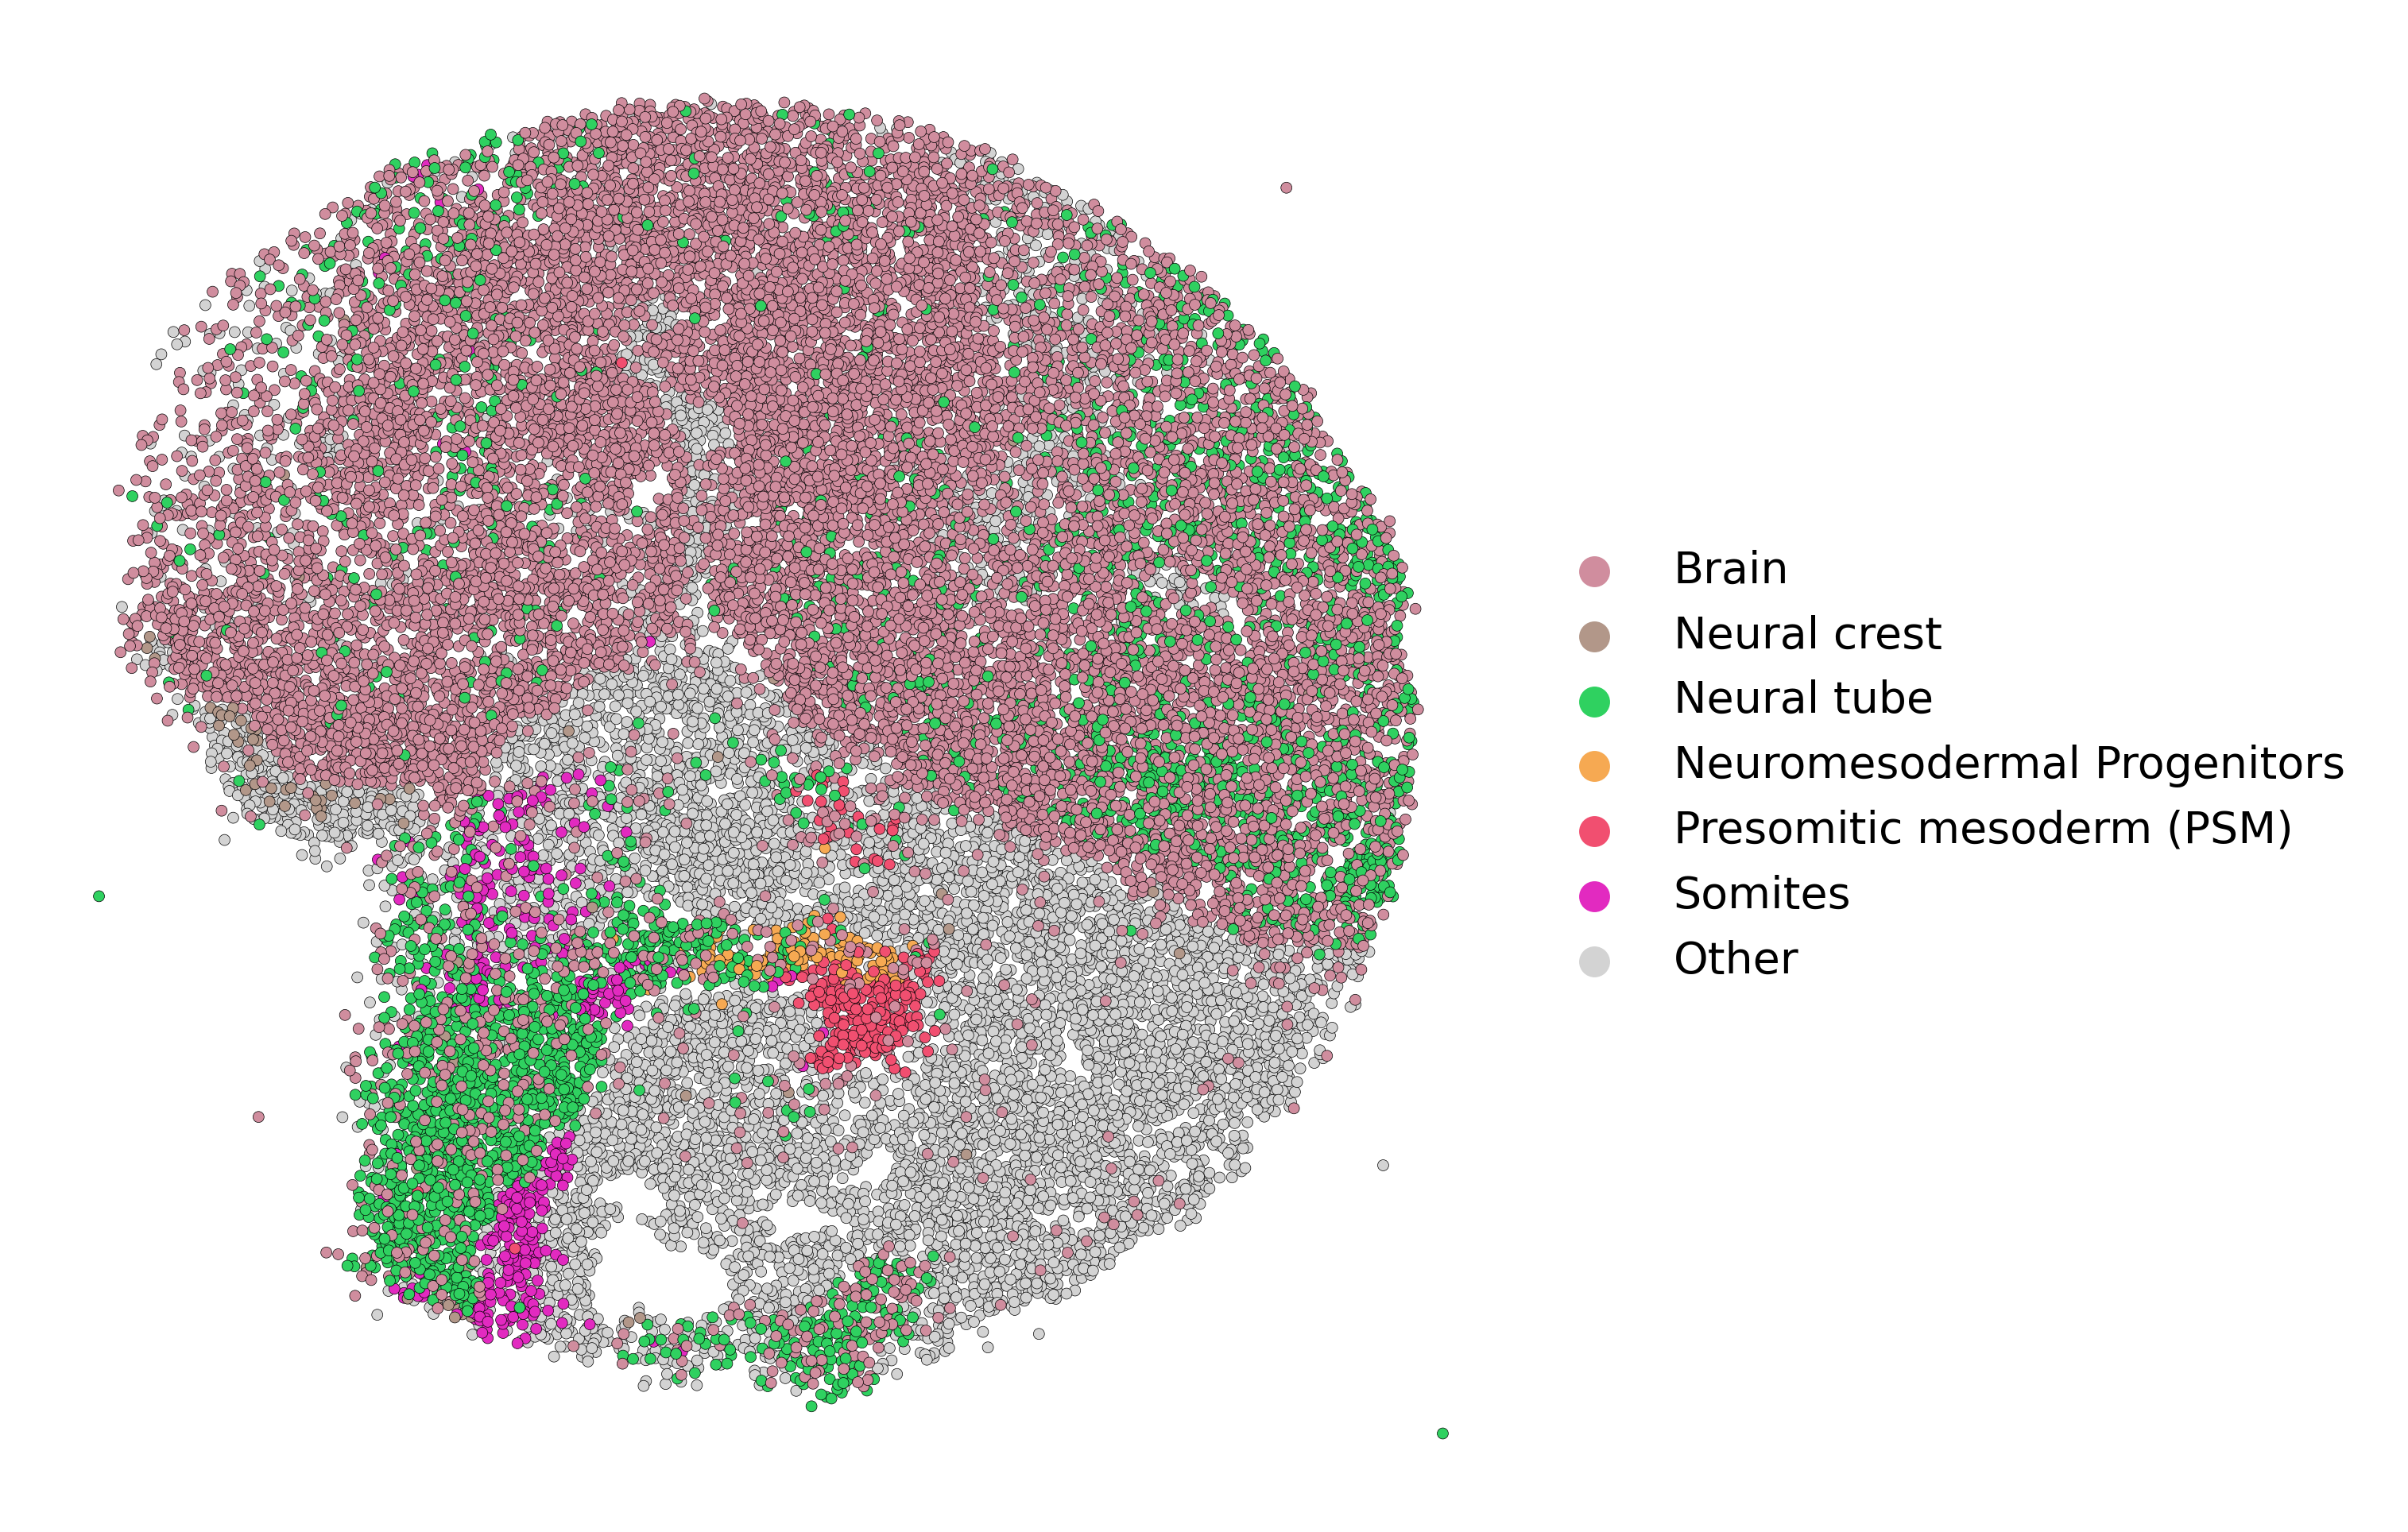

In [43]:
plt.rcParams['figure.figsize'] = [6, 6]
plt.rcParams['figure.dpi'] = 200

cell_types = adata.obs['cell_type'].unique().tolist()
palette = {
    "Ectopic tube": "#1af8e6",
    "Neural tube": "#2fd160",
    "Neural plate": "#e3f637",
    "Neural crest": "#b29789",
    "Somites": "#e22ac0",
    "Presomitic mesoderm (PSM)": "#f14f70",
    "Neuromesodermal Progenitors ": "#f6a952",
    # "Heart": "#2b3546",
    "Brain": "#d08d9e",
}   
show = list(palette.keys()).copy()
for ct in cell_types: 
    if ct not in palette:
        palette[ct] = '#d3d3d3'

sc.pl.embedding(
    adata, 
    color='cell_type', 
    frameon=False, 
    basis='spatial', 
    s=25, title='', 
    show=False,
    linewidth=0.125,
    edgecolor='black',
    palette=palette,
    groups=show
)

leg = plt.gca().get_legend()
if leg is not None:
    for text in leg.get_texts():
        if text.get_text() == 'NA':
            text.set_text('Other')
plt.savefig(
    './figures/mouse_embryo_celltypes.svg', 
    **savefig_params
)
plt.show()

In [144]:
adata = sc.read_h5ad('/Volumes/SSD/training_data/mouse_brain_wt_slideseq.h5ad')
adata.X = adata.layers['imputed_count'].copy()
coko = pd.read_parquet('/Users/koush/Downloads/simulated_count.parquet').loc[adata.obs_names]
dfko = pd.read_parquet('/Volumes/SSD/genome_screens/mouse_embryo/Tbx6_4n_0x.parquet')

In [145]:
wtko = sc.read_h5ad('/Users/koush/Downloads/mouse_trunkTbx6WT_KO.h5ad')
wtko.var_names = wtko.var['feature_name']
wt = wtko[wtko.obs['orig.ident'] == '200703_25']
ko = wtko[wtko.obs['orig.ident'] == '200808_21']
del wt.raw
del ko.raw
wt.obsm['X_umap'] = wt.obs[['umap_1', 'umap_2']].values
ko.obsm['X_umap'] = ko.obs[['umap_1', 'umap_2']].values

shared = np.intersect1d(wt.var_names, dfko.columns)

In [146]:

import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [147]:
adata = adata[dfko.index]

In [148]:
# mask = adata[adata.obs.cell_type.isin([
#     'Somites', 'Neural tube', 'Presomitic mesoderm (PSM)', 
#     'Neuromesodermal Progenitors'])].obs.index

# a = (wt[:, wt.var_names.isin(shared)].to_df()[shared].mean() - ko[
#     :, ko.var_names.isin(shared)].to_df()[shared].mean()).sort_values(
#     ascending=False, key=abs)
# b = (adata.to_df(layer='imputed_count')[shared].loc[mask].mean()-dfko[shared].loc[mask].mean()).sort_values(
# ascending=False, key=abs)
# c = (adata.to_df(layer='imputed_count')[shared].loc[mask].mean()-coko[shared].loc[mask].mean()).sort_values(
# ascending=False, key=abs)

# d = (adata.to_df(layer='imputed_count')[shared].loc[mask].mean()-dfko[shared].loc[mask].mean()).sample(frac=1).sort_values(
# ascending=False, key=abs)

# e = (wt[:, wt.var_names.isin(shared)].to_df()[shared].mean()*0 - ko[
#     :, ko.var_names.isin(shared)].to_df()[shared].mean()).sort_values(
#     ascending=False, key=abs)

# diff = pd.concat([a, b, c, d, e], axis=1)
# diff.columns = ['gt', 'sim', 'co', 'rand', 'zero']
# diff.to_csv('diff.csv')

In [149]:
diff = pd.read_csv('diff.csv')

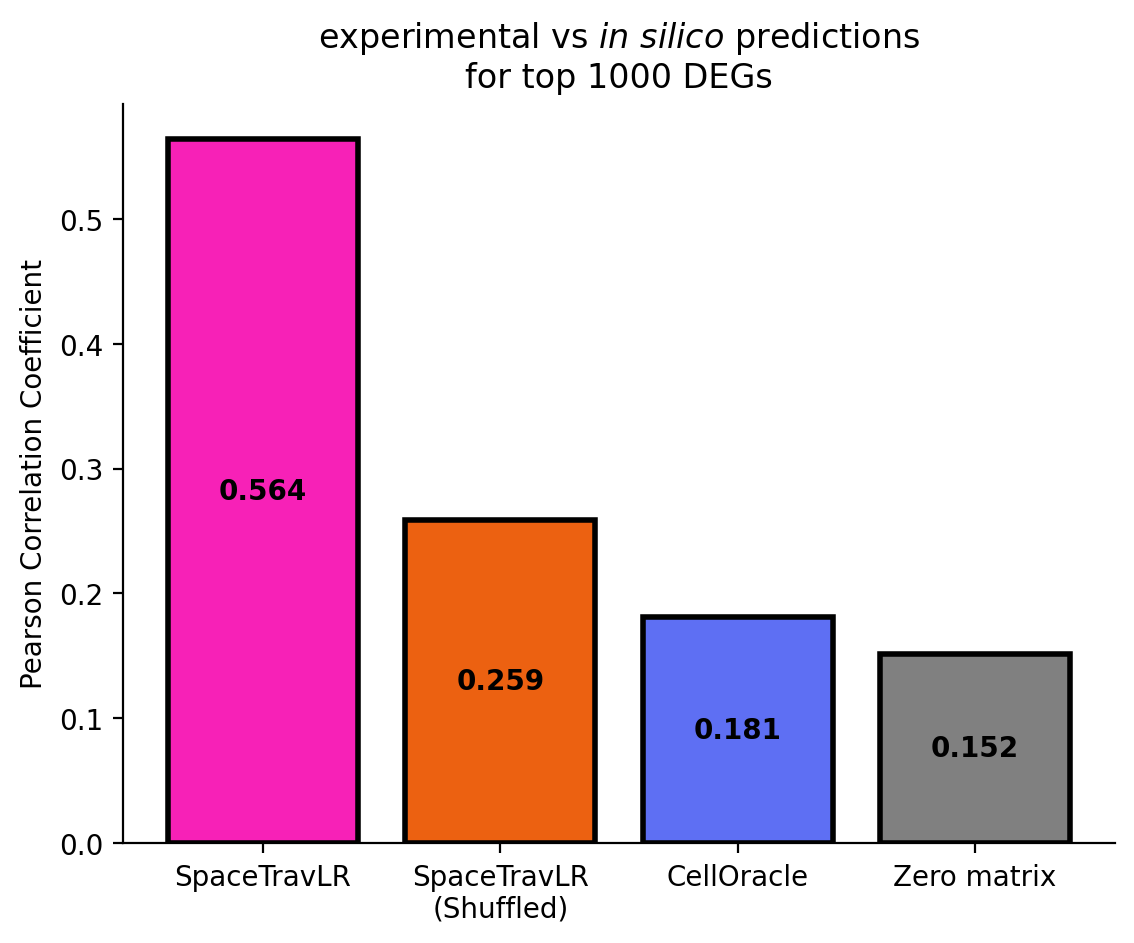

In [13]:
N = 1000
genes = diff['gt'].head(N).index

gt_sim_corr = pearsonr(diff['gt'].loc[genes], diff['sim'].loc[genes]).statistic
gt_co_corr = pearsonr(diff['gt'].loc[genes], diff['co'].loc[genes]).statistic
gt_rand_corr = pearsonr(diff['gt'].loc[genes], diff['rand'].loc[genes]).statistic
gt_shuffled_corr = pearsonr(diff['gt'].loc[genes], diff['zero'].loc[genes]).statistic

correlations = {
    'SpaceTravLR': gt_sim_corr, 
    'SpaceTravLR\n(Shuffled)': gt_rand_corr,
    'CellOracle': gt_co_corr, 
    'Zero matrix': gt_shuffled_corr
}

plt.bar(correlations.keys(), correlations.values(), linewidth=2, 
    edgecolor='black', color=["#f721b7", '#ec6111', "#5e6ff3", 'grey'])
plt.ylabel('Pearson Correlation Coefficient')
percentage_difference = ((gt_sim_corr - gt_co_corr) / gt_co_corr) * 100
plt.title(r'experimental vs $\it{in\ silico}$ predictions' + f'\nfor top ' + str(N) + ' DEGs')

for i, (key, value) in enumerate(correlations.items()):
    plt.text(i, value * 0.5, f'{value:.3f}', ha='center', 
        va='center', color='black', fontweight='bold')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig(
    './figures/barplot_comparison.svg', 
    **savefig_params
)
plt.show()

In [150]:
from scipy.stats import spearmanr

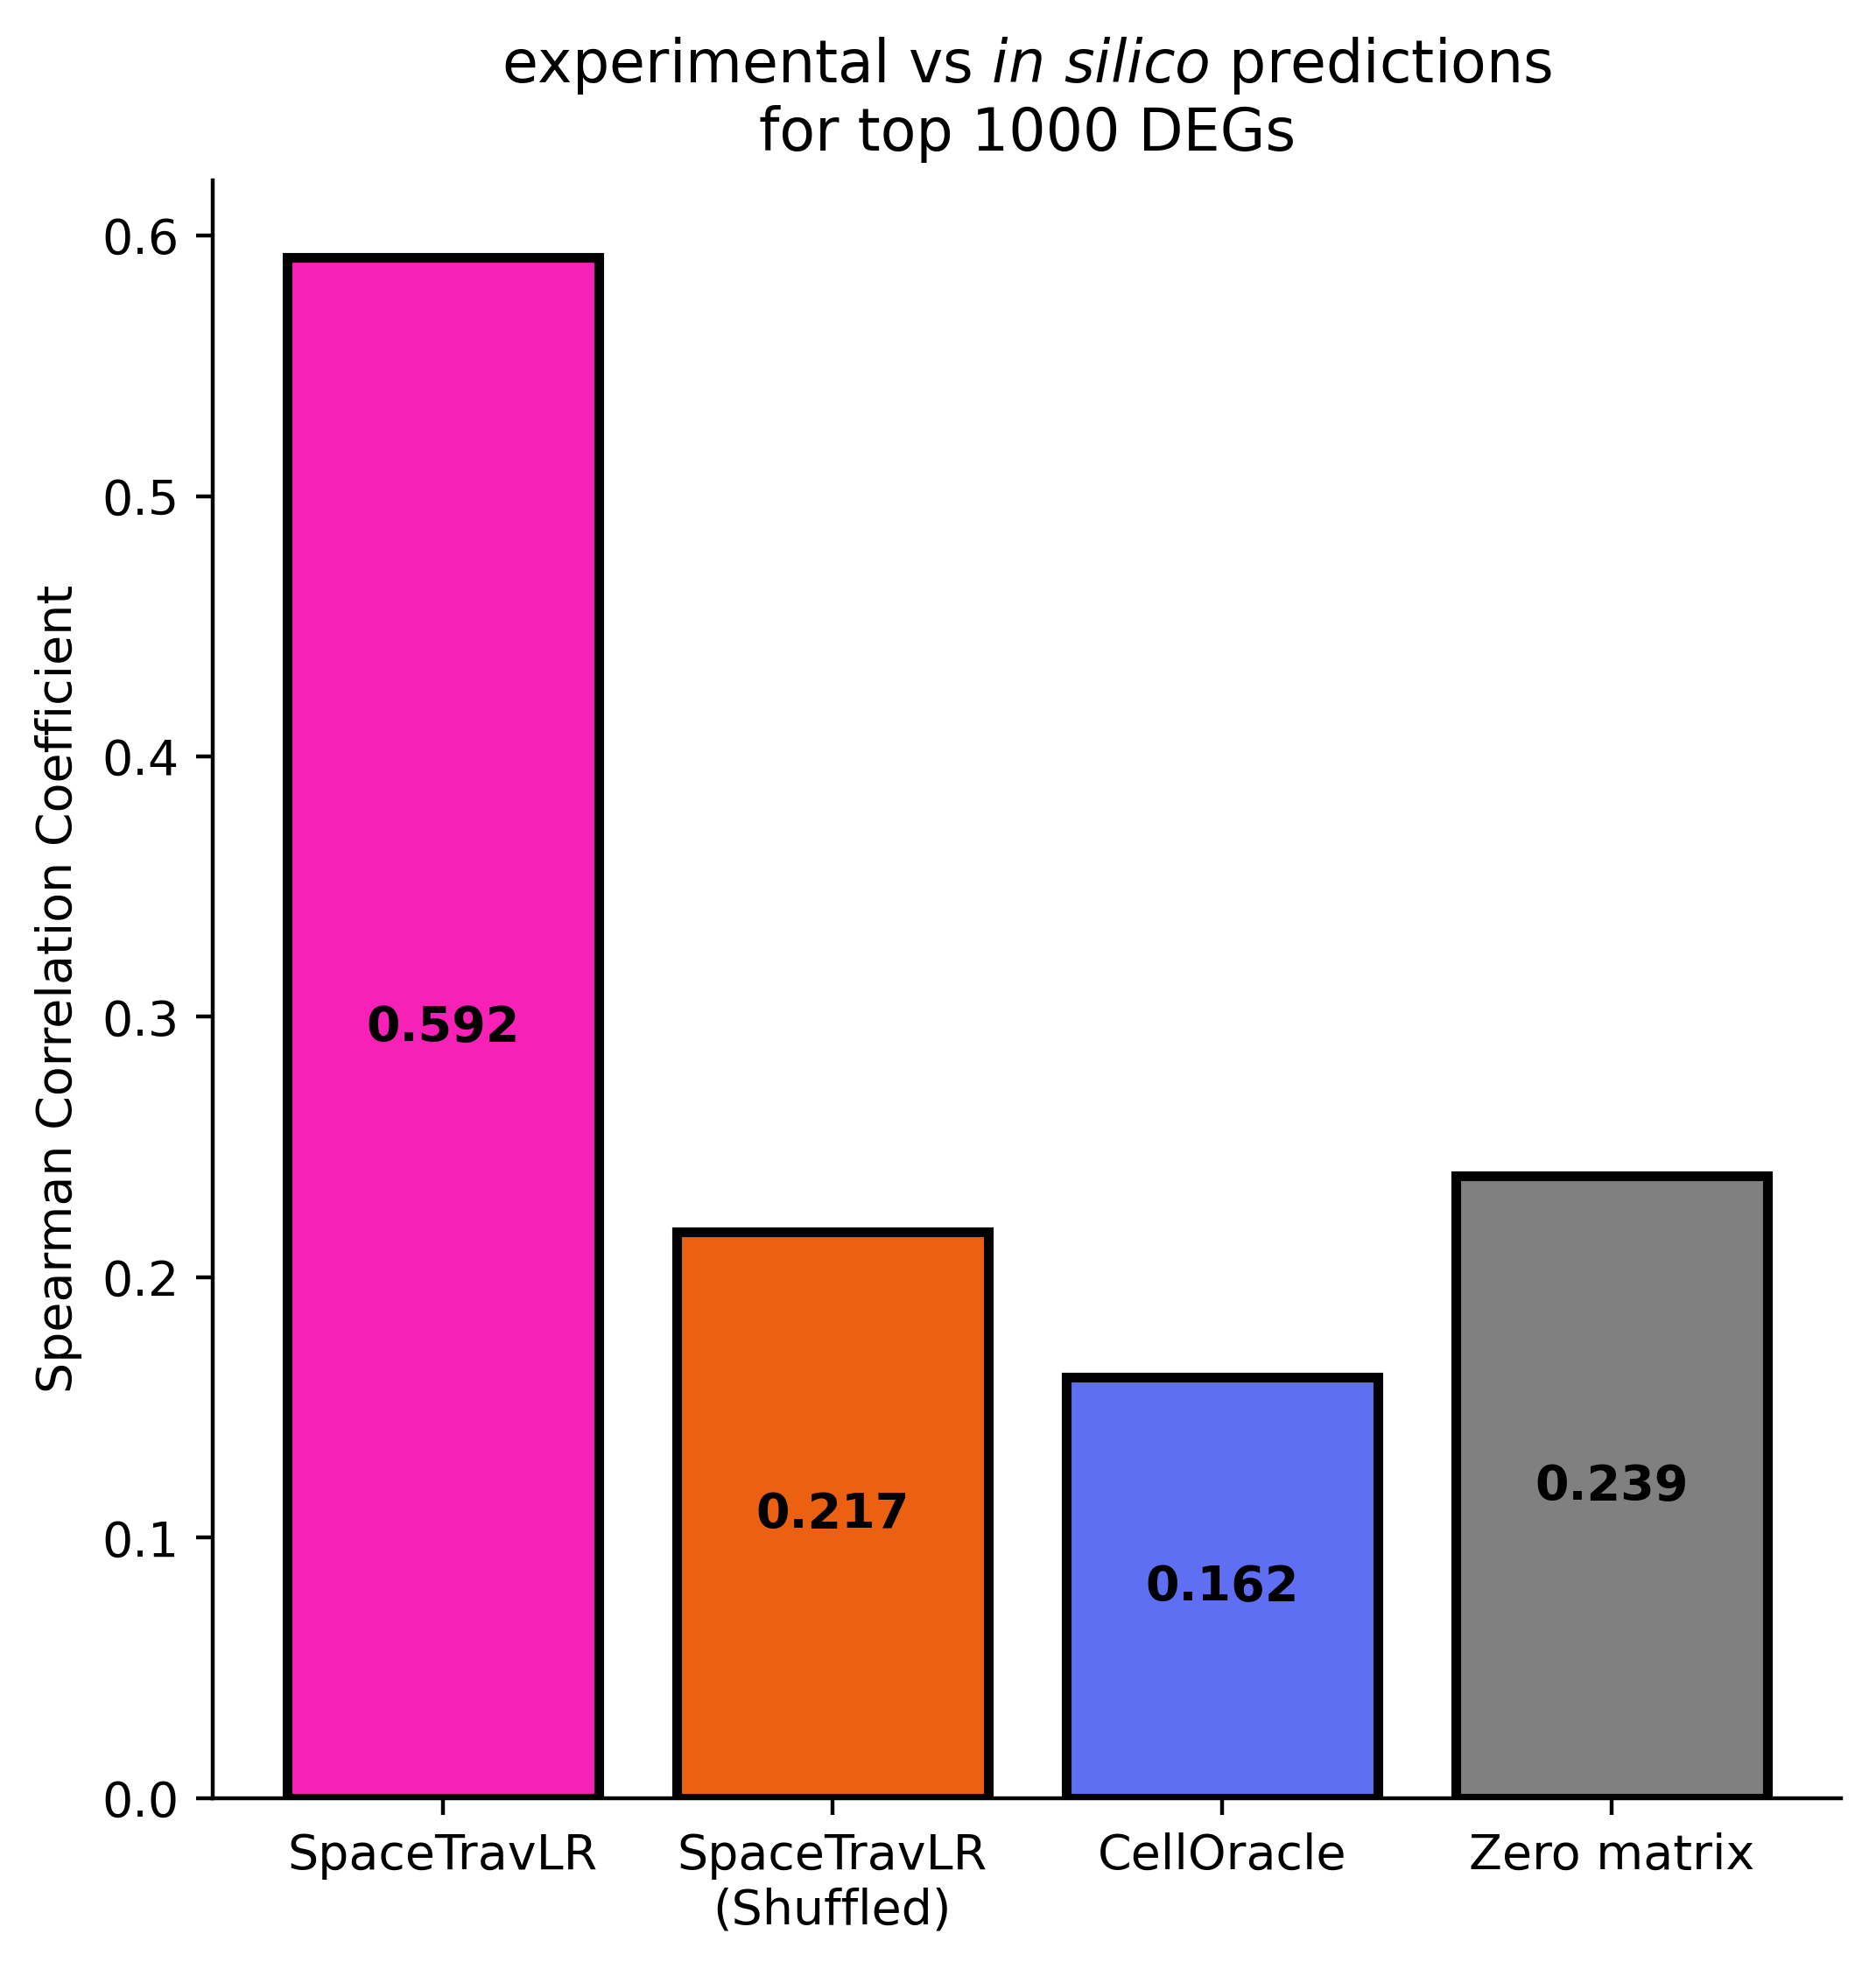

In [154]:
plt.rcParams['figure.figsize'] = [6, 6]
plt.rcParams['figure.dpi'] = 200

N = 1000
genes = diff['gt'].head(N).index

gt_sim_corr = spearmanr(diff['gt'].loc[genes], diff['sim'].loc[genes]).statistic
gt_co_corr = spearmanr(diff['gt'].loc[genes], diff['co'].loc[genes]).statistic
gt_rand_corr = spearmanr(diff['gt'].loc[genes], diff['rand'].loc[genes]).statistic
gt_shuffled_corr = spearmanr(diff['gt'].loc[genes], diff['zero'].loc[genes]).statistic

correlations = {
    'SpaceTravLR': gt_sim_corr, 
    'SpaceTravLR\n(Shuffled)': gt_rand_corr,
    'CellOracle': gt_co_corr, 
    'Zero matrix': gt_shuffled_corr
}

plt.bar(correlations.keys(), correlations.values(), linewidth=2, 
    edgecolor='black', color=["#f721b7", '#ec6111', "#5e6ff3", 'grey'])
plt.ylabel('Spearman Correlation Coefficient')
percentage_difference = ((gt_sim_corr - gt_co_corr) / gt_co_corr) * 100
plt.title(r'experimental vs $\it{in\ silico}$ predictions' + f'\nfor top ' + str(N) + ' DEGs')

for i, (key, value) in enumerate(correlations.items()):
    plt.text(i, value * 0.5, f'{value:.3f}', ha='center', 
        va='center', color='black', fontweight='bold')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig(
    './figures/barplot_comparison_spearman.svg', 
    **savefig_params
)
plt.show()